## Ford GoBike System Data Findings

### Investigating overview 

The overall goal of the presentation are to show the following :
    - How long the average trip takes
    - The count of each member with respect to there age
    - What is the Monthly Usage?
    - When are the most trips taken in terms of day of the week?
    - Which gender has  the highest Bike trips?
    - Does trip duration depends on user type?
    - Is there a relatioship between duration and customer's age?
    - Does trip duration depends on Gender?
    - how does the trip duration varies within Users?
    - What relationship is between day,duration_minutes and also the user_type
    - Is there any relationship between weekday,duration of mins and also the usertype?
    - Is there any relationship between the weekday,duration in minutes and also member age
    
    

Customers tend to take longer trips on average during weekdays with a relative spike during weekends as opposed to subscribers who take shorter trips in general during weekdays with a little spike during weekends.
    

### Dataset Overview
This data set includes information about individual rides made in GoBike bike-sharing system (now called Baywheels) covering the greater San Francisco Bay area in the month of feburary 2019.

Key :
Subscribers (i.e. daily commuters) Customers (i.e. tourists, students, etc.)

Renting a bike from the Ford GoBike System is a fantastic way of moving around in the city, both for enjoyment and work. There are two types of clients using the system : Subscribers and Customers. Where the Subscribers are known to be primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and occasionally around lunch time. Customers are known to be usually tourists or occassional riders who use the system mainly to explore the Bay Area.

#### Import all packages and set plots to be embedded inline

In [1]:
import numpy  as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests
import io

%matplotlib inline 

#### Supress warnings from output

In [2]:
import warnings
warnings.simplefilter("ignore")

#### Load in the dataset into a pandas dataframe

In [3]:
df_2019 = pd.read_csv("clean_Ford_2019.csv")

#### Note: The above slides has been set as "skip" type slide, for it not to show up when thw notebook is rendered as http slides

### How long does the average trip take?

An average ride duration lies in the 3-14 minute range

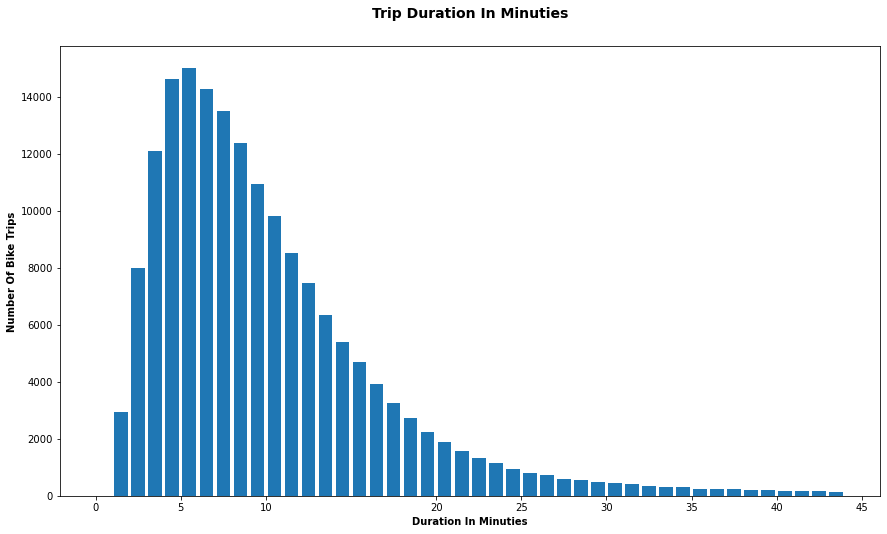

In [4]:
plt.figure(figsize = [14.70, 8.27])
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 20, 25, 30, 35,40,45]
labels = ["{}".format(val) for val in ticks]

plt.hist(data =df_2019, x = "duration_minutes", bins = bin_edges, rwidth = 0.8);
plt.title("Trip Duration In Minuties", y = 1.05, fontsize = 14, fontweight = "bold")
plt.xlabel("Duration In Minuties", fontweight = "bold")
plt.xticks(ticks, labels)
plt.ylabel("Number Of Bike Trips", fontweight="bold");

### The count of each member with respect to there age

We can see from the chart that our users are between the ages of 20 and 70 with majority of them around age 20- 45 which is also the same age range of working adults. also notr that during cleaning we dropped riders above 70

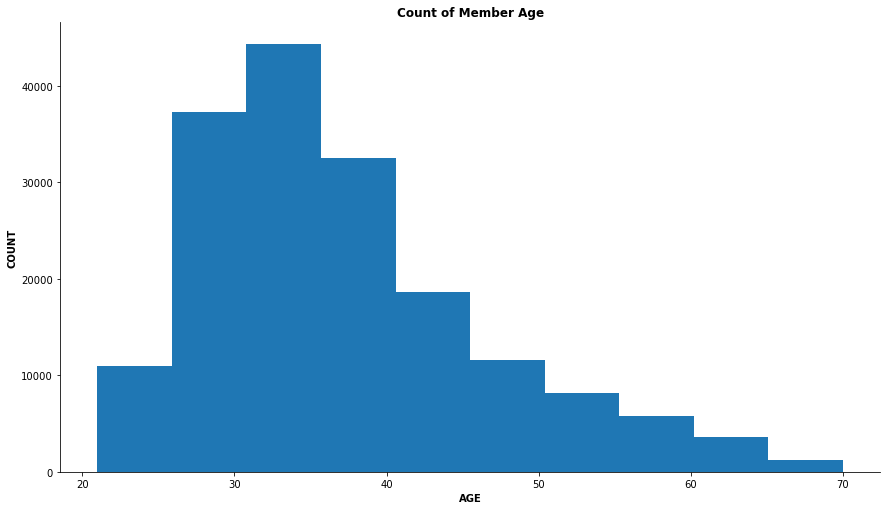

In [5]:
plt.figure(figsize = [14.70, 8.27])
plt.hist(data=df_2019, x='member_age')
plt.grid(False)
plt.xlabel('AGE', fontweight = "bold")
plt.ylabel('COUNT', fontweight = "bold")
plt.title('Count of Member Age', fontweight = "bold")
sb.despine();

### Does trip duration depends on user type?

At duration less than or equal to 60 minutes, both customers(casual) has achieved less duration of ues to the subscriber (members).

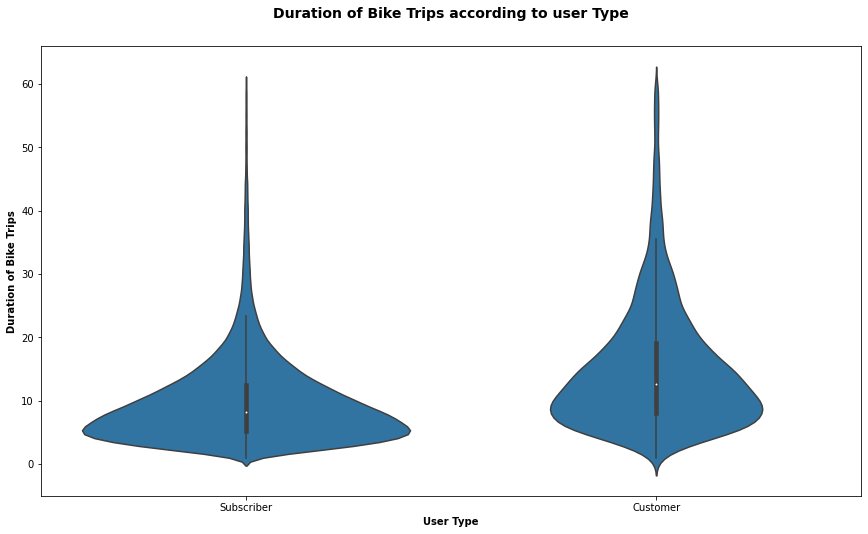

In [6]:
plt.figure(figsize =[14.70, 8.27])
sb.violinplot(data = df_2019.query("duration_minutes <= 60"), x = "user_type", y = "duration_minutes", color = sb.color_palette()[0])
plt.xlabel("User Type", fontweight = "bold")
plt.ylabel("Duration of Bike Trips", fontweight = "bold")
plt.title("Duration of Bike Trips according to user Type", y = 1.05, fontsize = 14, fontweight = "bold");

### Is there a relatioship between duration and customer's age?

We see that there is no obvious relationship and all we can infer from this data is most trips are below 200 mins

Butgoing back to univarate exploration, we were able to discover that the bulk of our data lies between 0-41 minutes.

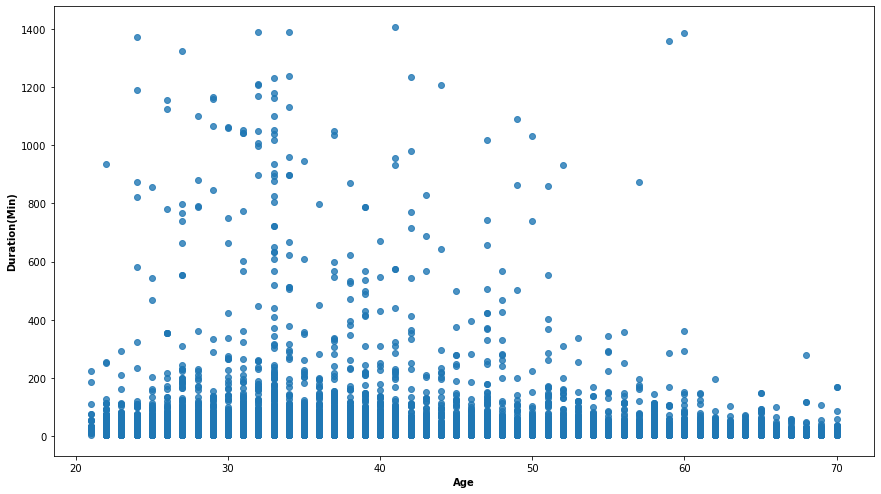

In [7]:
plt.figure(figsize =[14.70, 8.27])
sb.regplot(data = df_2019, x = 'member_age', y = 'duration_minutes', fit_reg =False)
plt.xlabel('Age', fontweight = "bold")
plt.ylabel('Duration(Min)',  fontweight = "bold");

### What relationship is between day,duration_minutes and also the user_type

We see a spike in trip duration on days that fall on weekends for customers and subscribers with customers taking longer trips

In [8]:
minutes_df = df_2019.query('duration_minutes <= 42')

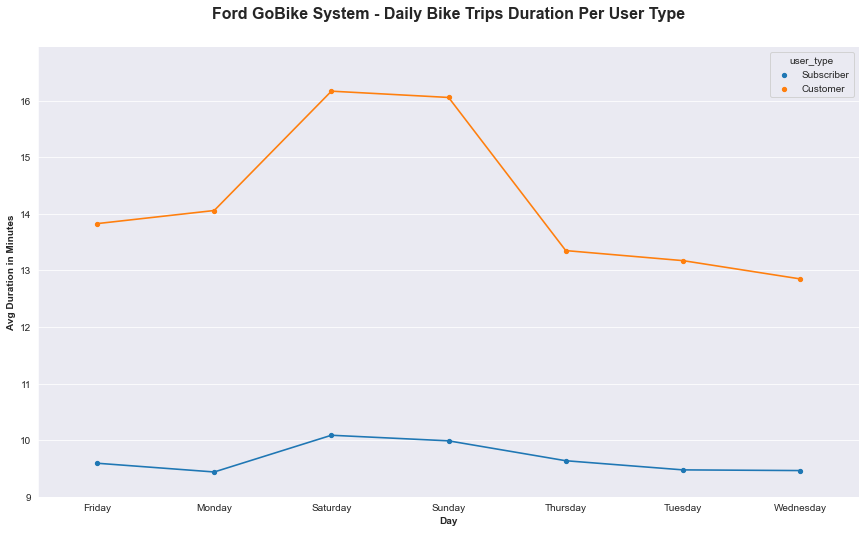

In [9]:
plt.figure(figsize =[14.70, 8.27])
sb.set_style("darkgrid")
day_order = minutes_df['start_day'].value_counts().sort_index().index
sb.pointplot(data = minutes_df, x='start_day', y='duration_minutes', hue='user_type', scale=.6, order = day_order, height=5, aspect=2, errwidth=False);
plt.xlabel('Day', fontweight = 'bold')
plt.ylabel('Avg Duration in Minutes', fontweight = 'bold')
plt.title("Ford GoBike System - Daily Bike Trips Duration Per User Type", y = 1.05, fontsize = 16, fontweight = 'bold');
sb.despine()


### Is there any relationship between weekday,duration of mins and also the usertype ?

Customers tend to take longer trips on average during weekdays with a relative spike during weekends as opposed to subscribers who take shorter trips in general during weekdays with a little spike during weekends.

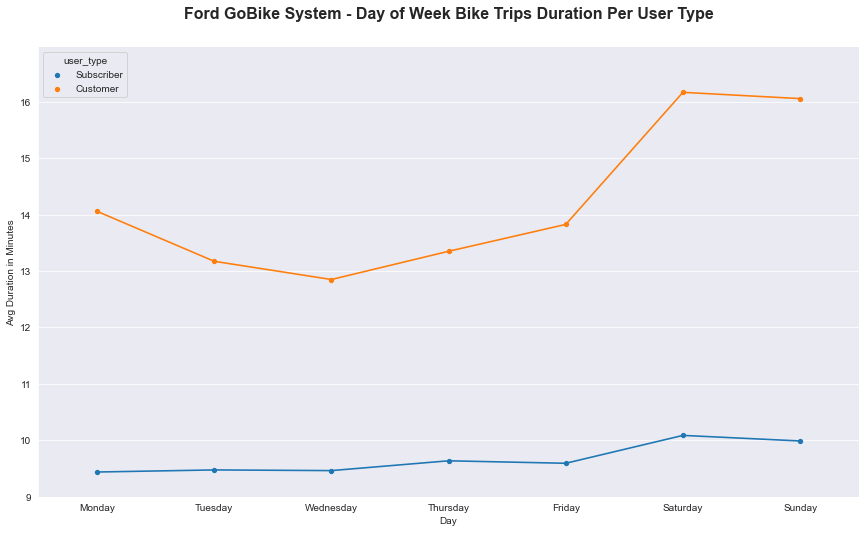

In [10]:
plt.figure(figsize =[14.70, 8.27])
sb.set_style("darkgrid")
order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.pointplot(data = minutes_df, x='start_day', y='duration_minutes', hue='user_type', scale=.6, order = order, height=5, aspect=2, errwidth=False);
plt.xlabel('Day')
plt.ylabel('Avg Duration in Minutes')
plt.title("Ford GoBike System - Day of Week Bike Trips Duration Per User Type", y = 1.05, fontsize = 16, fontweight = 'bold');
sb.despine()

### Is there any relationship between the weekday,duration in minutes and also member age

We see older people (61 -70) take longer trips in terms of duration, while people below 60 and in the working class bracket (20 - 40) take shorter trips during weekdays, as we've noticed in previous trends, there is always a spike in duration during weekends

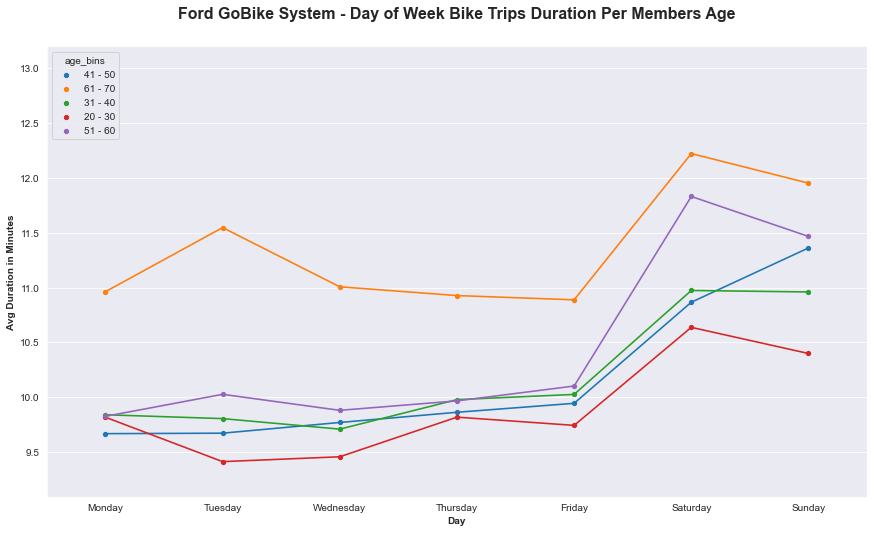

In [16]:
minutes_df['age_bins'] = minutes_df['member_age'].apply(lambda x: '20 - 30' if 20<x<=30
                                                  else '31 - 40' if 31<=x<=40
                                                  else '41 - 50' if 41<=x<=50
                                                  else '51 - 60' if 51<=x<=60
                                                  else '61 - 70' if 61<=x<=70
                                                else x)
minutes_df.age_bins.value_counts()


plt.figure(figsize =[14.70, 8.27])
sb.set_style("darkgrid")
sb.pointplot(data = minutes_df, x='start_day', y='duration_minutes', hue='age_bins', scale=0.6, order = order, height=5, aspect=2, errwidth=False);
plt.xlabel('Day', fontweight = 'bold')
plt.ylabel('Avg Duration in Minutes', fontweight = 'bold')
plt.title("Ford GoBike System - Day of Week Bike Trips Duration Per Members Age", y = 1.05, fontsize = 16, fontweight = 'bold');
sb.despine()

In [18]:
!jupyter nbconvert Ford_GoBike_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_Part_II.ipynb to slides
[NbConvertApp] Writing 869594 bytes to Ford_GoBike_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Toshiba Pc\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Toshiba Pc\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Toshiba Pc\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Toshiba Pc\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Toshiba Pc\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(